# Part 1 of RAVDESS Emotional Speech Recognition project by Anuj Soni (mcsnipe97)

## Some info about the RAVDESS DataSet
---
the filename identifiers as per the official RAVDESS website:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

This means the meta data for the audio file is:

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)

---

In [1]:
import librosa
import librosa.display

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import pandas as pd
import IPython.display as ipd #sounds in notebooks
import os
import sys
import warnings

### Ignoring deprecation warnings for old packages, use consistent version of packages!

In [4]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
rav = "data\\audio_speech_actors_01-24\\"

dir_list = os.listdir(rav)
dir_list[:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [3]:
emotion = []
sex = []
path = []
for i in dir_list:
    name = os.listdir(rav+i)
    for folder in name:
        part = folder.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2==0:
            temp = 'female'
        else:
            temp = 'male'
        sex.append(temp)
        path.append(rav+i+'\\'+folder)

emo_data = {
    1: 'neutral',
    2: 'neutral', 
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise' 
}

# Loading the dataset

In [4]:
rav_df = pd.DataFrame(emotion)
rav_df = rav_df.replace(emo_data)
rav_df = pd.concat([pd.DataFrame(sex), rav_df], axis=1)
rav_df.columns = ['gender', 'emotion']
rav_df['labels'] = rav_df.gender+'_'+rav_df.emotion
rav_df['source'] = 'RAVDESS'
rav_df = pd.concat([rav_df,pd.DataFrame(path, columns = ['path'])],axis=1)
rav_df = rav_df.drop(['gender', 'emotion'], axis =1)
rav_df.labels.value_counts()

female_neutral     144
male_neutral       144
female_surprise     96
female_disgust      96
male_sad            96
female_happy        96
female_angry        96
female_fear         96
male_surprise       96
male_happy          96
female_sad          96
male_disgust        96
male_fear           96
male_angry          96
Name: labels, dtype: int64

# Exploring the Dataset

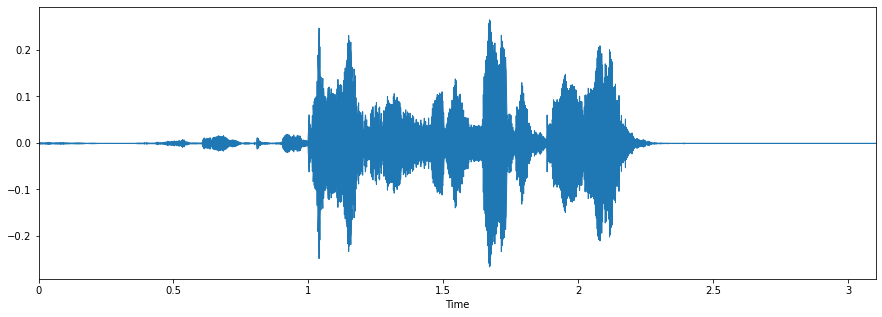

In [5]:
#picking a random track
file_name = rav + 'Actor_05//03-01-06-02-02-02-05.wav'
data, sampling_rate = librosa.load(file_name)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(file_name)

#### Saving the dataframe to csv

In [6]:
rav_df.to_csv("pathData.csv", index=False)